In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\TSA\Bhiwadi1.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,PM2.5
Date,
2021-01-01,228.53
2021-01-02,222.37
2021-01-03,128.14
2021-01-04,68.44
2021-01-05,62.51


In [31]:
#Mean - missed value first put None to NaN in dataset
import numpy as np
def change1(a):
  df[a] = df[a].replace(np.NaN, df[a].mean())

In [32]:
#PM2.5	PM10	NO2	SO2	CO	Ozone	Temp	RH	WS	WD	SR
l=["PM2.5"]
for i in l:
  change1(i)

In [33]:
df.tail()

,PM2.5
Date,
2021-12-27,92.11
2021-12-28,124.25
2021-12-29,105.15
2021-12-30,161.22
2021-12-31,156.41


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<AxesSubplot:>

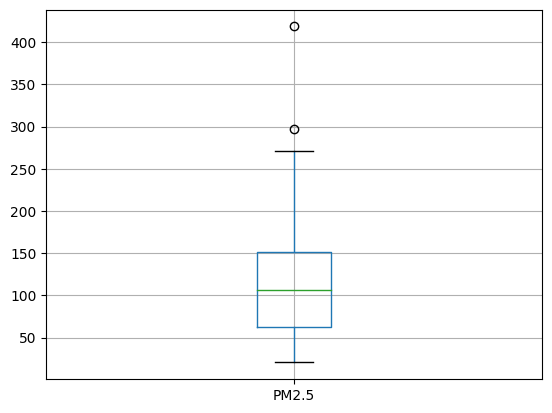

In [35]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [36]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [37]:
scaled_dataset[:2,:]

array([[0.52260448],
       [0.50712437]])

In [38]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [39]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (361, 1)
X (361, 4, 1)


In [40]:
#Splitting the dataset
n_train = 3*30
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (271, 4, 1)
X_test (90, 4, 1)
Y_train (271, 1)
Y_test (90, 1)


In [41]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')   

In [42]:
history = model.fit(X_train, Y_train, epochs=50,
                    batch_size=8, validation_data=(X_test, Y_test),
                    verbose=2, shuffle=False)

Epoch 1/50
34/34 - 5s - loss: 0.0324 - val_loss: 0.0088 - 5s/epoch - 133ms/step
Epoch 2/50
34/34 - 0s - loss: 0.0303 - val_loss: 0.0222 - 176ms/epoch - 5ms/step
Epoch 3/50
34/34 - 0s - loss: 0.0239 - val_loss: 0.0119 - 148ms/epoch - 4ms/step
Epoch 4/50
34/34 - 0s - loss: 0.0195 - val_loss: 0.0099 - 144ms/epoch - 4ms/step
Epoch 5/50
34/34 - 0s - loss: 0.0163 - val_loss: 0.0099 - 172ms/epoch - 5ms/step
Epoch 6/50
34/34 - 0s - loss: 0.0166 - val_loss: 0.0098 - 149ms/epoch - 4ms/step
Epoch 7/50
34/34 - 0s - loss: 0.0150 - val_loss: 0.0101 - 168ms/epoch - 5ms/step
Epoch 8/50
34/34 - 0s - loss: 0.0143 - val_loss: 0.0099 - 149ms/epoch - 4ms/step
Epoch 9/50
34/34 - 0s - loss: 0.0142 - val_loss: 0.0099 - 208ms/epoch - 6ms/step
Epoch 10/50
34/34 - 0s - loss: 0.0147 - val_loss: 0.0098 - 144ms/epoch - 4ms/step
Epoch 11/50
34/34 - 0s - loss: 0.0148 - val_loss: 0.0098 - 134ms/epoch - 4ms/step
Epoch 12/50
34/34 - 0s - loss: 0.0138 - val_loss: 0.0098 - 158ms/epoch - 5ms/step
Epoch 13/50
34/34 - 0s - l

In [43]:
#Taking predictions
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

print(mse)
rmse = np.sqrt(mse)
print(rmse)

3/3 [==============================] - 1s 5ms/step
0.007216240582430237
0.08494845838760252


In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE', mape)

MAPE 27.071117673098005


In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE', mape)

MAPE 27.071117673098005


In [46]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (90, 1)
X_test (90, 4, 1)
scaled Values shape (365, 1)


In [47]:
#Scaling back to the original scale
d = scaled_dataset[:271,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:90,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:90,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (271, 1)
Y_pred (90, 1)
concat y_pred (90, 1)
concat Y_test (90, 1)


In [48]:
#Take inverse transform
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (90, 1)
Y_predicted (90, 1)


In [49]:
#Calculate error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

1142.6793196536044
33.80354004617866


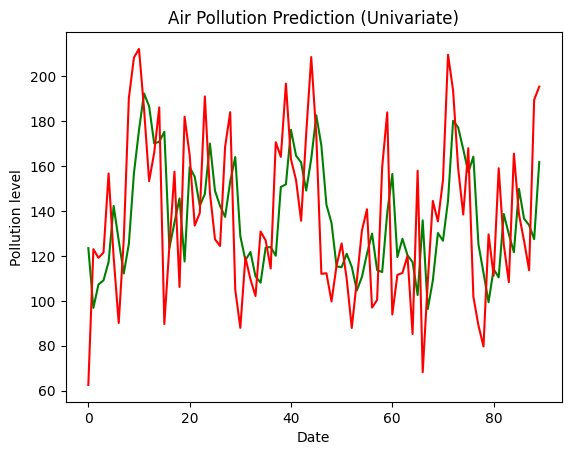

In [50]:
#Plot the graph between actual vs predicted values
plt.plot(Y_predicted[:100,:], color= 'green')
plt.plot(Y_tested[:100,:] , color = 'red')
plt.title("Air Pollution Prediction (Univariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.show()
 

In [51]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)

MAPE 21.9730697969517


In [52]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 33.80354004617866
Mean of Test data  137.53366666666668


array([<AxesSubplot:xlabel='Date'>], dtype=object)

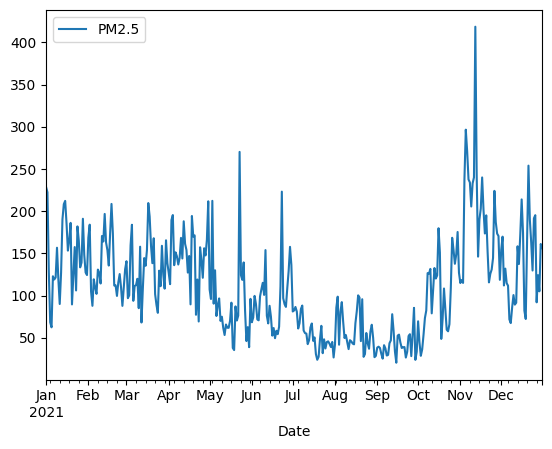

In [53]:
# A simple plot to visualize the correlation between the columns
df.plot(subplots=True)
#df.plot(subplots=True,figsize=(15,13));

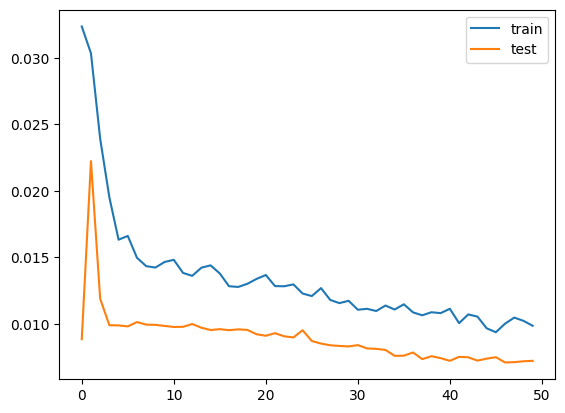

In [54]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
 